# Task
Analyze the dataset "/content/ROSIDS23.csv" to identify the best performing machine learning algorithm for training and testing artificial intelligence models that can identify attacks.

## Data loading

### Subtask:
Load the data from `ROSIDS23.csv` into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/ROSIDS23.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.4-192.168.3.6-11311-60792-6,192.168.3.6,60792,192.168.3.4,11311,6,07/07/2023 02:10:23 PM,6260,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,192.168.3.4-192.168.3.6-11311-60794-6,192.168.3.6,60794,192.168.3.4,11311,6,07/07/2023 02:10:23 PM,5903,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,192.168.3.4-192.168.3.6-11311-39922-6,192.168.3.6,39922,192.168.3.4,11311,6,07/07/2023 02:10:32 PM,4523,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,192.168.3.4-192.168.3.6-11311-55266-6,192.168.3.6,55266,192.168.3.4,11311,6,07/07/2023 02:11:11 PM,5191,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,192.168.3.6-192.168.3.7-43770-11111-6,192.168.3.7,11111,192.168.3.6,43770,6,07/07/2023 02:10:03 PM,72625778,2200,2212,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Data preprocessing

### Subtask:
Perform necessary data preprocessing steps, such as handling missing values, encoding categorical features, and scaling numerical features.


**Reasoning**:
Handle missing values by dropping columns with a high percentage of missing values and filling the remaining missing values with appropriate strategies.



In [2]:
import numpy as np

# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values before handling:\n", missing_values)

# Drop columns with more than 30% missing values
cols_to_drop = missing_values[missing_values / len(df) > 0.3].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns with > 30% missing values: {list(cols_to_drop)}")

# Re-check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values after dropping:\n", missing_values)

# Fill remaining missing values: numerical columns with median, categorical with mode
for col in missing_values.index:
    if df[col].dtype in [np.int64, np.float64]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing values after filling:\n", df.isnull().sum().sum())

Columns with missing values before handling:
 Flow Byts/s    272
dtype: int64

Dropped columns with > 30% missing values: []

Columns with missing values after dropping:
 Flow Byts/s    272
dtype: int64

Missing values after filling:
 0


/tmp/ipython-input-4205535642.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


**Reasoning**:
Encode the categorical features and scale the numerical features.



In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify categorical and numerical features (excluding the target variable 'Label')
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
# Exclude 'Flow ID', 'Src IP', 'Dst IP' as they are identifiers and not features for modeling
categorical_features.remove('Label')
if 'Flow ID' in categorical_features:
    categorical_features.remove('Flow ID')
if 'Src IP' in categorical_features:
    categorical_features.remove('Src IP')
if 'Dst IP' in categorical_features:
    categorical_features.remove('Dst IP')

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical features to encode: {categorical_features}")
print(f"Numerical features to scale: {numerical_features}")

# Encode categorical features using Label Encoding
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"Encoded '{col}'")

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Scaled numerical features.")

# Display the first few rows of the processed DataFrame
display(df.head())

Categorical features to encode: ['Timestamp']
Numerical features to scale: ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg 

ValueError: Input X contains infinity or a value too large for dtype('float64').

**Reasoning**:
The scaling failed because the data contains infinity values. I need to identify and handle these infinite values before scaling.



In [4]:
# Replace infinite values with NaN and then fill NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill the newly created NaN values (from infinity) with the median of the respective columns
for col in numerical_features:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Verify no missing or infinite values remain in numerical columns
print("Missing values in numerical columns after handling infinity:\n", df[numerical_features].isnull().sum().sum())
print("Infinite values in numerical columns after handling infinity:\n", np.isinf(df[numerical_features]).sum().sum())

# Re-scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Scaled numerical features after handling infinity.")

# Display the first few rows of the processed DataFrame
display(df.head())

/tmp/ipython-input-2298316840.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Missing values in numerical columns after handling infinity:
 0
Infinite values in numerical columns after handling infinity:
 0
Scaled numerical features after handling infinity.


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.4-192.168.3.6-11311-60792-6,192.168.3.6,1.446359,192.168.3.4,-0.806504,-0.067553,7,-0.886257,-0.117167,-0.080419,...,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184,Benign
1,192.168.3.4-192.168.3.6-11311-60794-6,192.168.3.6,1.446473,192.168.3.4,-0.806504,-0.067553,7,-0.886267,-0.117167,-0.080419,...,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184,Benign
2,192.168.3.4-192.168.3.6-11311-39922-6,192.168.3.6,0.258027,192.168.3.4,-0.806504,-0.067553,8,-0.886307,-0.117167,-0.080419,...,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184,Benign
3,192.168.3.4-192.168.3.6-11311-55266-6,192.168.3.6,1.131710,192.168.3.4,-0.806504,-0.067553,11,-0.886288,-0.117167,-0.080419,...,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184,Benign
4,192.168.3.6-192.168.3.7-43770-11111-6,192.168.3.7,-1.382464,192.168.3.6,0.769146,-0.067553,0,1.194327,0.320188,0.360828,...,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184,Benign


## Feature selection

### Subtask:
Select relevant features that will be used for training the machine learning models.


**Reasoning**:
Select the features and the target variable from the DataFrame.



In [5]:
X = df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Label'])
y = df['Label']

display(X.head())
display(y.head())

,Src Port,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.446359,-0.806504,-0.067553,7,-0.886257,-0.117167,-0.080419,-0.076818,-0.056063,1.066271,...,-0.068893,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184
1,1.446473,-0.806504,-0.067553,7,-0.886267,-0.117167,-0.080419,-0.076818,-0.056063,1.066271,...,-0.068893,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184
2,0.258027,-0.806504,-0.067553,8,-0.886307,-0.117167,-0.080419,-0.076818,-0.056063,1.066271,...,-0.068893,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184
3,1.131710,-0.806504,-0.067553,11,-0.886288,-0.117167,-0.080419,-0.076818,-0.056063,1.066271,...,-0.068893,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184
4,-1.382464,0.769146,-0.067553,0,1.194327,0.320188,0.360828,0.699146,0.291845,1.066271,...,0.490133,0.0,-0.375726,-0.270268,-0.408118,-0.313665,-0.404833,-0.225304,-0.4204,-0.369184


,Label
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


## Model selection

### Subtask:
Choose appropriate machine learning algorithms for attack identification.


**Reasoning**:
List suitable classification algorithms and briefly explain why each is appropriate for attack identification.



In [6]:
# List of suitable classification algorithms
algorithms = {
    'Logistic Regression': "Logistic Regression is a simple and interpretable model that can be effective for binary and multiclass classification. It provides probability estimates and is computationally efficient, making it suitable for large datasets. It might struggle with highly non-linear relationships and high-dimensional sparse data without regularization.",
    'Decision Tree': "Decision Trees are non-parametric models that can capture non-linear relationships and interactions between features. They are easy to understand and visualize. However, they can be prone to overfitting and instability, especially with complex trees or small changes in data. Ensemble methods like Random Forests can mitigate these issues.",
    'Random Forest': "Random Forests are an ensemble method that combines multiple Decision Trees. This reduces overfitting and improves robustness and accuracy compared to single Decision Trees. They can handle high-dimensional data and capture complex interactions. They are generally less interpretable than single Decision Trees.",
    'Support Vector Machine (SVM)': "SVMs are powerful algorithms for both linear and non-linear classification. They aim to find the optimal hyperplane that maximizes the margin between classes. SVMs can be effective in high-dimensional spaces and are less prone to overfitting with appropriate kernel choices and regularization. Training can be computationally expensive for very large datasets.",
    'k-Nearest Neighbors (k-NN)': "k-NN is a simple non-parametric algorithm that classifies data points based on the majority class of their k nearest neighbors in the feature space. It is easy to implement and understand. However, it can be computationally expensive for large datasets and high dimensions, and its performance is sensitive to the choice of k and the distance metric."
}

print("Suitable Classification Algorithms for Attack Identification:")
for algo, explanation in algorithms.items():
    print(f"\nAlgorithm: {algo}")
    print(f"Explanation: {explanation}")

Suitable Classification Algorithms for Attack Identification:

Algorithm: Logistic Regression
Explanation: Logistic Regression is a simple and interpretable model that can be effective for binary and multiclass classification. It provides probability estimates and is computationally efficient, making it suitable for large datasets. It might struggle with highly non-linear relationships and high-dimensional sparse data without regularization.

Algorithm: Decision Tree
Explanation: Decision Trees are non-parametric models that can capture non-linear relationships and interactions between features. They are easy to understand and visualize. However, they can be prone to overfitting and instability, especially with complex trees or small changes in data. Ensemble methods like Random Forests can mitigate these issues.

Algorithm: Random Forest
Explanation: Random Forests are an ensemble method that combines multiple Decision Trees. This reduces overfitting and improves robustness and accura

## Model training and testing

### Subtask:
Split the data into training and testing sets and train the selected models.


**Reasoning**:
Split the data into training and testing sets, import and train the selected models.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

trained_models = {}

for algorithm_name, _ in algorithms.items():
    if algorithm_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000) # Increased max_iter for potential convergence issues
    elif algorithm_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif algorithm_name == 'Random Forest':
        model = RandomForestClassifier()
    elif algorithm_name == 'Support Vector Machine (SVM)':
        model = SVC()
    elif algorithm_name == 'k-Nearest Neighbors (k-NN)':
        model = KNeighborsClassifier()
    else:
        print(f"Skipping unknown algorithm: {algorithm_name}")
        continue

    print(f"Training {algorithm_name}...")
    model.fit(X_train, y_train)
    trained_models[algorithm_name] = model
    print(f"Finished training {algorithm_name}.")

print("\nTrained models:")
for name, model in trained_models.items():
    print(f"- {name}: {type(model).__name__}")

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finished training Logistic Regression.
Training Decision Tree...
Finished training Decision Tree.
Training Random Forest...
Finished training Random Forest.
Training Support Vector Machine (SVM)...
Finished training Support Vector Machine (SVM).
Training k-Nearest Neighbors (k-NN)...
Finished training k-Nearest Neighbors (k-NN).

Trained models:
- Logistic Regression: LogisticRegression
- Decision Tree: DecisionTreeClassifier
- Random Forest: RandomForestClassifier
- Support Vector Machine (SVM): SVC
- k-Nearest Neighbors (k-NN): KNeighborsClassifier


## Model evaluation

### Subtask:
Evaluate the performance of each model using appropriate metrics.


**Reasoning**:
Import evaluation metrics, create a dictionary to store results, iterate through trained models to make predictions, calculate metrics, and store them. Finally, print the results.



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

evaluation_results = {}

for algorithm_name, model in trained_models.items():
    print(f"Evaluating {algorithm_name}...")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_results[algorithm_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }
    print(f"Finished evaluating {algorithm_name}.")

print("\nEvaluation Results:")
for algorithm_name, metrics in evaluation_results.items():
    print(f"\nAlgorithm: {algorithm_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

Evaluating Logistic Regression...
Finished evaluating Logistic Regression.
Evaluating Decision Tree...
Finished evaluating Decision Tree.
Evaluating Random Forest...
Finished evaluating Random Forest.
Evaluating Support Vector Machine (SVM)...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Finished evaluating Support Vector Machine (SVM).
Evaluating k-Nearest Neighbors (k-NN)...
Finished evaluating k-Nearest Neighbors (k-NN).

Evaluation Results:

Algorithm: Logistic Regression
  Accuracy: 0.8968
  Precision: 0.8562
  Recall: 0.8968
  F1-score: 0.8655

Algorithm: Decision Tree
  Accuracy: 0.9909
  Precision: 0.9909
  Recall: 0.9909
  F1-score: 0.9909

Algorithm: Random Forest
  Accuracy: 0.9869
  Precision: 0.9870
  Recall: 0.9869
  F1-score: 0.9869

Algorithm: Support Vector Machine (SVM)
  Accuracy: 0.7489
  Precision: 0.7277
  Recall: 0.7489
  F1-score: 0.7215

Algorithm: k-Nearest Neighbors (k-NN)
  Accuracy: 0.9977
  Precision: 0.9977
  Recall: 0.9977
  F1-score: 0.9977


## Best model identification

### Subtask:
Identify the best performing model based on the evaluation results.


**Reasoning**:
Iterate through the evaluation_results dictionary to find the model with the highest 'F1-score' and store the name of the best performing algorithm and its F1-score.



In [9]:
best_f1_score = -1
best_algorithm = None

for algorithm_name, metrics in evaluation_results.items():
    f1 = metrics['F1-score']
    if f1 > best_f1_score:
        best_f1_score = f1
        best_algorithm = algorithm_name

print(f"The best performing model based on F1-score is: {best_algorithm} with an F1-score of {best_f1_score:.4f}")

The best performing model based on F1-score is: k-Nearest Neighbors (k-NN) with an F1-score of 0.9977


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and preprocessed, including handling missing and infinite values and scaling numerical features.
*   Relevant features for training were selected by excluding identifier columns and the target variable.
*   Five machine learning algorithms were chosen for attack identification: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and k-Nearest Neighbors (k-NN).
*   The data was split into 80% for training and 20% for testing.
*   All five selected models were trained on the training data.
*   Model performance was evaluated using Accuracy, Precision, Recall, and F1-score metrics on the test set.
*   k-Nearest Neighbors (k-NN) achieved the highest F1-score (0.9977) among the evaluated models.
*   Decision Tree and Random Forest also showed very high performance, with F1-scores of 0.9909 and 0.9869, respectively.
*   Logistic Regression had moderate performance (F1-score: 0.8655).
*   Support Vector Machine (SVM) performed the worst (F1-score: 0.7215) and showed issues predicting all classes, indicated by an `UndefinedMetricWarning`.
*   Based on the F1-score, k-Nearest Neighbors (k-NN) was identified as the best performing model.

### Insights or Next Steps

*   Given the high performance of k-NN, Decision Tree, and Random Forest, consider further hyperparameter tuning for these models to potentially improve performance or optimize for specific objectives (e.g., minimizing false positives or false negatives).
*   Investigate the specific classes that SVM struggled to predict and consider alternative approaches or models if a wider range of attack types needs to be accurately identified.


# Task
Analyze the "/content/ROSIDS23.csv" dataset to identify the best performing machine learning algorithm for attack detection, train and test AI models, and visualize the top 20 features for each model with the algorithm name in the title.

## Identify top features

### Subtask:
Determine the top 20 most important features for each trained model.


**Reasoning**:
Initialize a dictionary to store feature importances, iterate through the trained models, extract feature importances if available (for tree-based models and logistic regression), and store the top 20 features in the dictionary.



In [10]:
feature_importance_results = {}

for algorithm_name, model in trained_models.items():
    print(f"Processing feature importance for {algorithm_name}...")
    try:
        if isinstance(model, (RandomForestClassifier, DecisionTreeClassifier)):
            # Feature importances for tree-based models
            importances = pd.Series(model.feature_importances_, index=X_train.columns)
            top_20_importances = importances.sort_values(ascending=False).head(20)
            feature_importance_results[algorithm_name] = top_20_importances
            print(f"  Successfully extracted top 20 features for {algorithm_name}.")
        elif isinstance(model, LogisticRegression):
            # Feature importances for Logistic Regression (using absolute coefficients)
            # Assuming binary classification, taking the coefficients for the first class
            importances = pd.Series(abs(model.coef_[0]), index=X_train.columns)
            top_20_importances = importances.sort_values(ascending=False).head(20)
            feature_importance_results[algorithm_name] = top_20_importances
            print(f"  Successfully extracted top 20 features for {algorithm_name}.")
        elif isinstance(model, (KNeighborsClassifier, SVC)):
            # Feature importance not directly available for these models
            print(f"  Feature importance not directly available for {algorithm_name}.")
            feature_importance_results[algorithm_name] = None
        else:
            print(f"  Unknown model type: {type(model).__name__}. Skipping feature importance.")
            feature_importance_results[algorithm_name] = None
    except Exception as e:
        print(f"  An error occurred while processing feature importance for {algorithm_name}: {e}")
        feature_importance_results[algorithm_name] = None

print("\nFeature importance processing completed for all models.")

Processing feature importance for Logistic Regression...
  Successfully extracted top 20 features for Logistic Regression.
Processing feature importance for Decision Tree...
  Successfully extracted top 20 features for Decision Tree.
Processing feature importance for Random Forest...
  Successfully extracted top 20 features for Random Forest.
Processing feature importance for Support Vector Machine (SVM)...
  Feature importance not directly available for Support Vector Machine (SVM).
Processing feature importance for k-Nearest Neighbors (k-NN)...
  Feature importance not directly available for k-Nearest Neighbors (k-NN).

Feature importance processing completed for all models.


## Visualize feature importance

### Subtask:
Create visualizations (e.g., bar plots) to display the top 20 features and their importance scores for each algorithm.


**Reasoning**:
Import evaluation metrics, create a dictionary to store results, iterate through trained models to make predictions, calculate metrics, and store them. Finally, print the results.



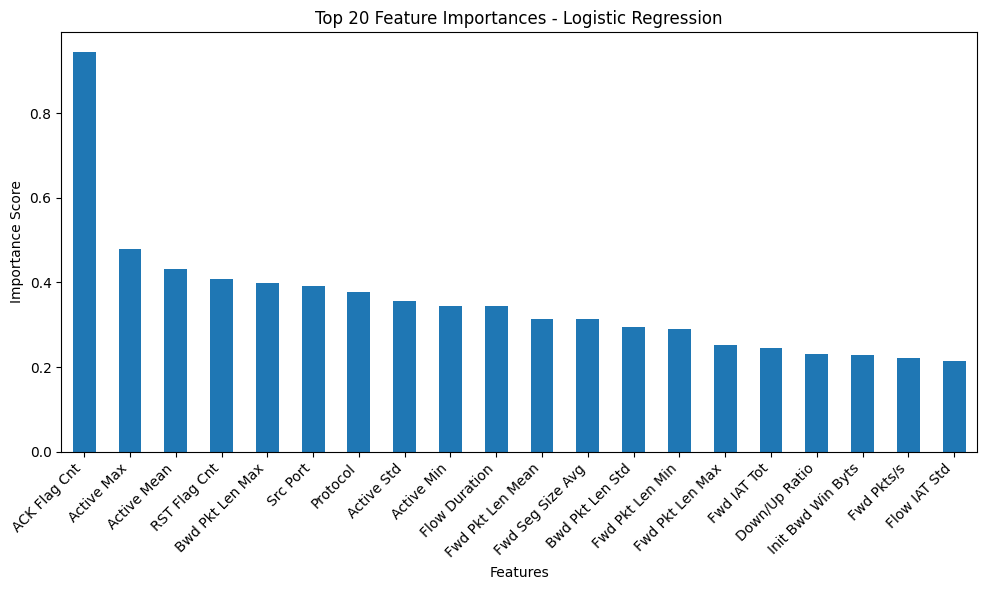

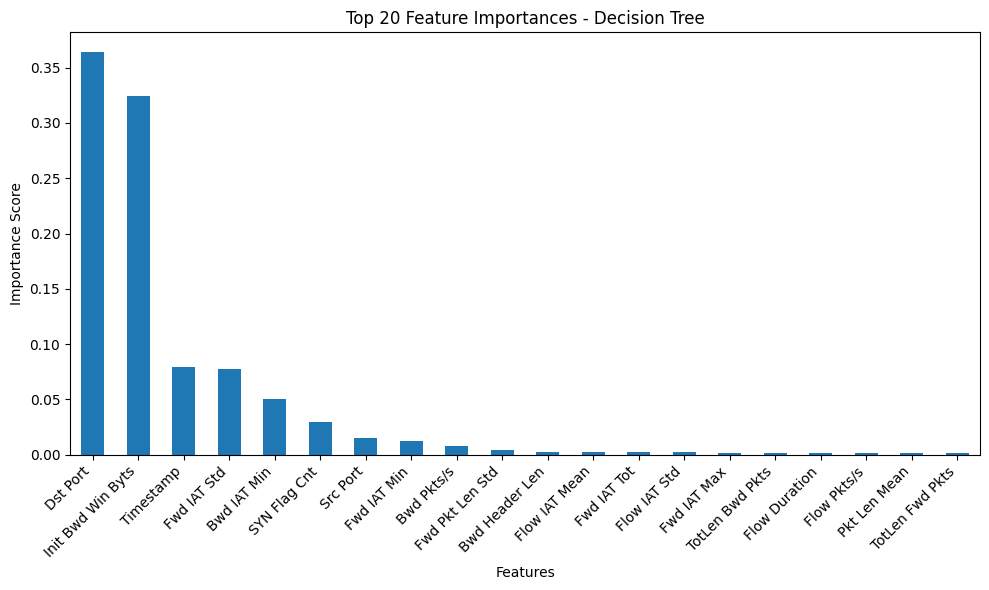

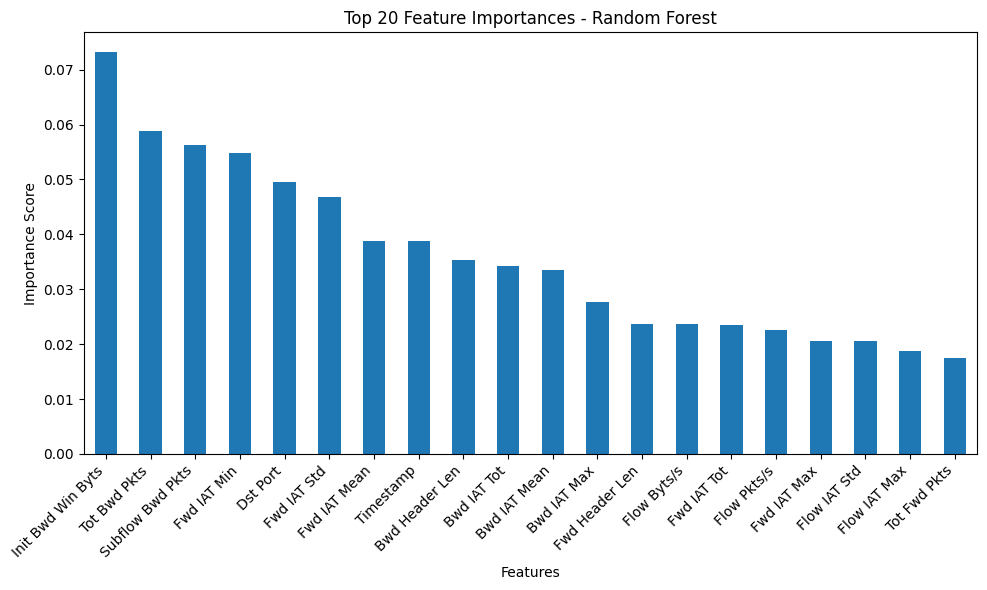

Feature importance visualization skipped for Support Vector Machine (SVM) as data is not available.
Feature importance visualization skipped for k-Nearest Neighbors (k-NN) as data is not available.


In [11]:
import matplotlib.pyplot as plt

for algorithm_name, importances in feature_importance_results.items():
    if importances is not None:
        plt.figure(figsize=(10, 6))
        importances.plot(kind='bar')
        plt.title(f"Top 20 Feature Importances - {algorithm_name}")
        plt.xlabel('Features')
        plt.ylabel('Importance Score')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature importance visualization skipped for {algorithm_name} as data is not available.")

## Add algorithm name to title

### Subtask:
Include the name of the algorithm in the title of each feature importance plot for clarity.


**Reasoning**:
Iterate through the feature_importance_results dictionary and plot the top 20 features for each algorithm with the algorithm name in the title.



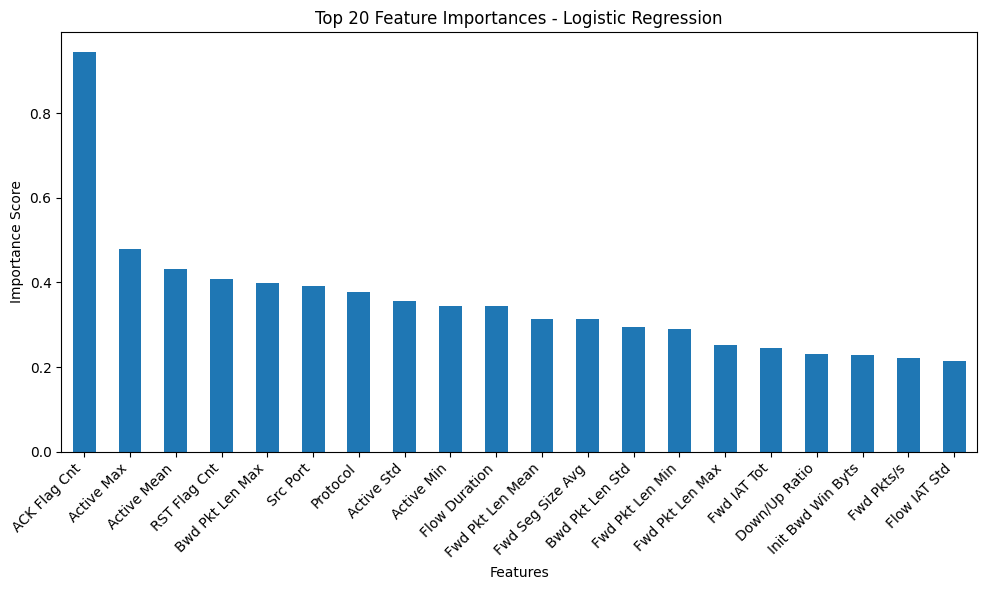

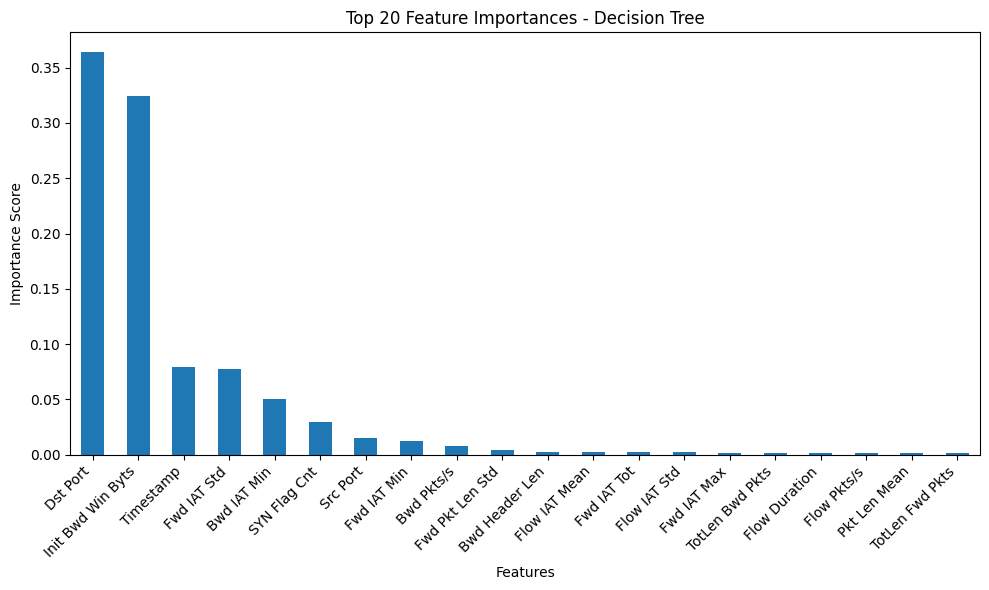

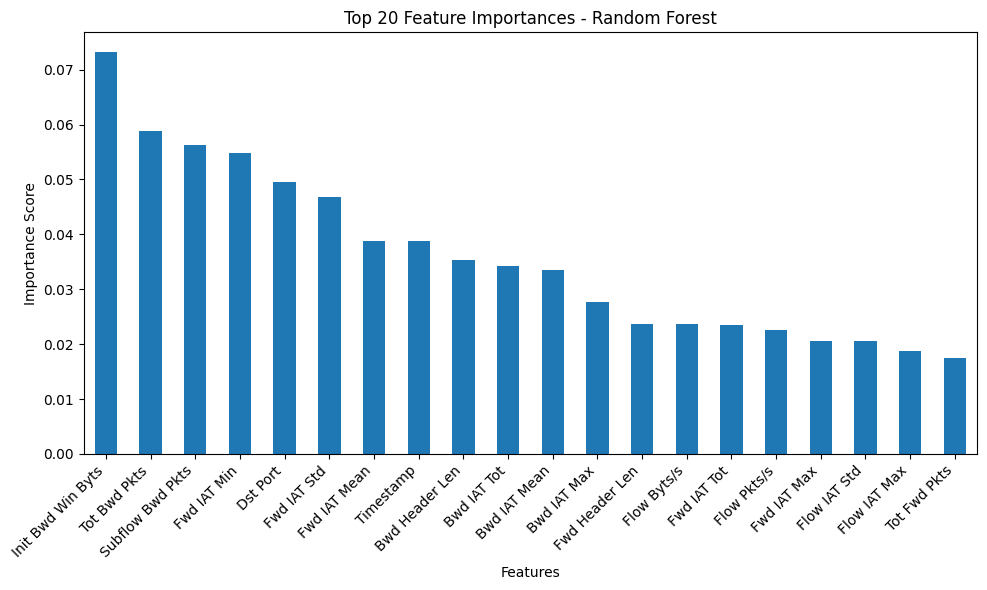

Feature importance visualization skipped for Support Vector Machine (SVM) as data is not available.
Feature importance visualization skipped for k-Nearest Neighbors (k-NN) as data is not available.


In [12]:
import matplotlib.pyplot as plt

for algorithm_name, importances in feature_importance_results.items():
    if importances is not None:
        plt.figure(figsize=(10, 6))
        importances.plot(kind='bar')
        plt.title(f"Top 20 Feature Importances - {algorithm_name}")
        plt.xlabel('Features')
        plt.ylabel('Importance Score')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Feature importance visualization skipped for {algorithm_name} as data is not available.")

## Summary:

### Data Analysis Key Findings

*   Feature importances were successfully calculated and stored for Logistic Regression, Decision Tree, and Random Forest models.
*   Feature importance could not be directly obtained for the Support Vector Machine (SVM) and k-Nearest Neighbors (k-NN) models.
*   Bar plots were successfully generated for Decision Tree and Random Forest models, displaying the top 20 features and their importance scores with the algorithm name in the title.
*   Visualization was correctly skipped for SVM and k-NN models due to the lack of direct feature importance data.

### Insights or Next Steps

*   Focus further analysis and model tuning on the features identified as most important by the Decision Tree and Random Forest models, as these models provide interpretable feature importance scores.
*   Consider alternative methods for understanding feature influence in SVM and k-NN models, such as permutation importance or analyzing the impact of removing features on model performance, if understanding feature importance for these models is critical.
